## Download data  

In [ ]:
!gdown --id 1bUBWn2Osoc6Y1XskxF_o0JgWVFw0iV_6

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bUBWn2Osoc6Y1XskxF_o0JgWVFw0iV_6
To: /content/NonLinear_data.npy
100% 5.57k/5.57k [00:00<00:00, 19.2MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(42)

## Load Data

In [ ]:
data_path = '/content/NonLinear_data.npy'
data = np.load(data_path, allow_pickle=True).item()
X, labels = data["X"],  data["labels"].astype(int)
X, labels = torch.tensor(X, dtype=torch.float32), torch.tensor(labels, dtype=torch.long)

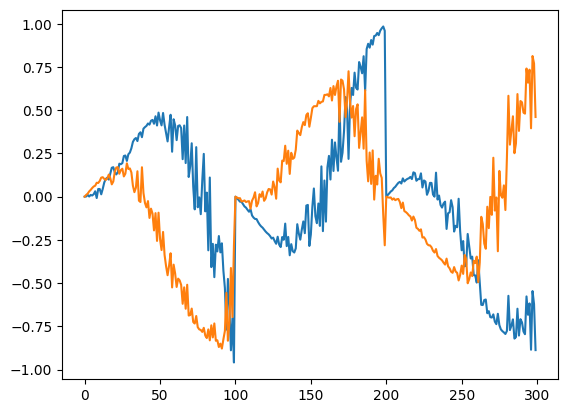

In [ ]:
plt.plot(X, label='X')

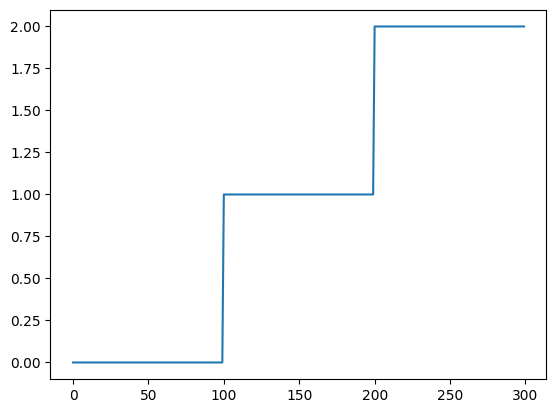

In [ ]:
plt.plot(labels, label='labels')

In [ ]:
class CustomDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.y)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [ ]:
train_dataset = CustomDataset(X, labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
######################### YOUR CODE HERE #########################
# Thiết kế model theo yêu cầu đề  bài
# Hidden layer 1: Linear layer in_features = input_dims (2), out_features = hidden_dims (128),
# activation = relu
# Output layer: Linear layer in_features = hidden_dims (128), out_features = output_dims (3),
class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
      super(MLP, self).__init__()
      self.linear1 = nn.Linear(input_dims, hidden_dims)
      self.out = nn.Linear(hidden_dims, output_dims)
      self.relu = nn.ReLU()

    def forward(self, x):
      x = self.linear1(x)
      x = self.relu(x)
      out = self.out(x)
      return out.squeeze(1)
##################################################################

model = MLP(input_dims=2, hidden_dims=128, output_dims=3).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
num_epochs = 500
train_losses = []
train_acc = []

for epoch in range(num_epochs):
  model.train()
  train_loss = 0.0
  accuracy = 0
  cnt = 0
  for X, y in train_loader:
    X, y = X.to(device), y.to(device)
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
    accuracy += (torch.argmax(outputs, 1)==y).sum().item()
    cnt += len(y)

  train_loss /= len(train_loader)
  train_losses.append(train_loss)
  accuracy /= cnt
  train_acc.append(accuracy)

  print(f"Epoch {epoch+1}/{num_epochs}, Train_Loss: {train_loss:.4f},  Train_acc: {accuracy:.4f}")

Epoch 1/500, Train_Loss: 1.0046,  Train_acc: 0.4967
Epoch 2/500, Train_Loss: 0.8844,  Train_acc: 0.5433
Epoch 3/500, Train_Loss: 0.8256,  Train_acc: 0.5767
Epoch 4/500, Train_Loss: 0.7872,  Train_acc: 0.5467
Epoch 5/500, Train_Loss: 0.7652,  Train_acc: 0.5467
Epoch 6/500, Train_Loss: 0.7519,  Train_acc: 0.5433
Epoch 7/500, Train_Loss: 0.7434,  Train_acc: 0.5467
Epoch 8/500, Train_Loss: 0.7412,  Train_acc: 0.5600
Epoch 9/500, Train_Loss: 0.7449,  Train_acc: 0.5767
Epoch 10/500, Train_Loss: 0.7341,  Train_acc: 0.5767
Epoch 11/500, Train_Loss: 0.7457,  Train_acc: 0.5633
Epoch 12/500, Train_Loss: 0.6956,  Train_acc: 0.5700
Epoch 13/500, Train_Loss: 0.7165,  Train_acc: 0.5533
Epoch 14/500, Train_Loss: 0.7034,  Train_acc: 0.5633
Epoch 15/500, Train_Loss: 0.6965,  Train_acc: 0.5700
Epoch 16/500, Train_Loss: 0.7091,  Train_acc: 0.5767
Epoch 17/500, Train_Loss: 0.7062,  Train_acc: 0.5633
Epoch 18/500, Train_Loss: 0.6927,  Train_acc: 0.5700
Epoch 19/500, Train_Loss: 0.6868,  Train_acc: 0.5833
Ep

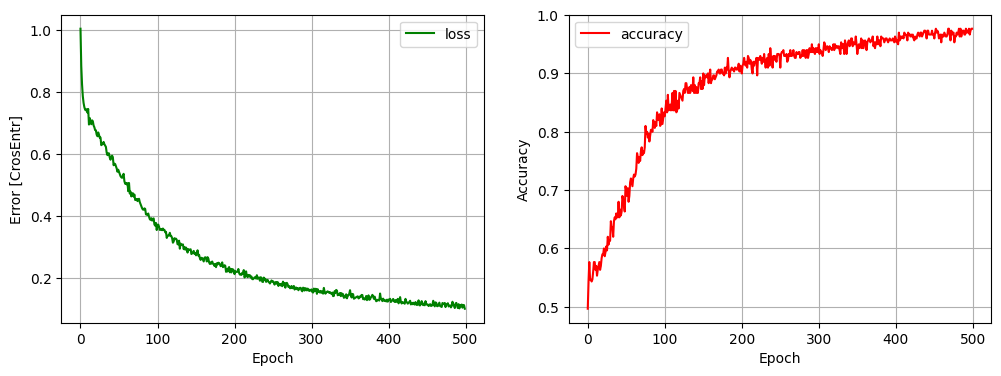

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)